In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist["data"], mnist["target"];

Saving figure some_digit_plot


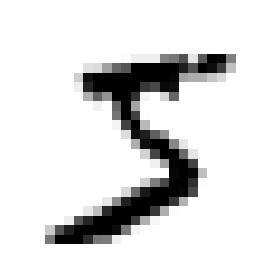

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
#print(X[0][7*28+10])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [ ]:
#cross validation bei kleineren datensätzen gut
#bei datensätzen mit wenigen, ungleich verteilten y werten, ist die genaugigkeit (normales crossval) nicht so aussagekräftig
#deshalb confusion_matrix berechnen gibt false negative, false positive, true negative und true positive an
#zudem precision (%, dass prediction stimmt) und recall ( prozentsatz der richtig als positiven eingaben gegenüber allesn positiven im datensatz)
#f1 score berechnen, der presition score und recall score vereint.
# mit höherer precision geht niedrigerer recall (trefferquote) einher
# über  decision_function() anstatt predict hat man zugriff auf den errechneten score eines datenpunkts und kann daran selbst entschieden ob negativ oder positiv


In [19]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [39]:
some_digit = X[0]
sgd_clf.predict([some_digit])

[5 0 4 ... 4 5 6]


array([ True])

In [46]:
from sklearn.model_selection import cross_val_score

r = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
r.mean()

0.8669666666666668

In [55]:
from sklearn.model_selection import cross_val_score

r5 = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
r5.mean()

0.9570333333333334

In [48]:

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [58]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 687)


0.8370879772350012

In [57]:
recall_score(y_train_5, y_train_pred) # = 4096 / (4096 + 1891)

0.6511713705958311

In [59]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846